In [1]:
import os.path
from dataset_analysis import *
import random

# Utils

In [2]:
def path_generator(dataset_root_dir, dataset_split_list):
    """
    A generator that yields the path of the annotation file, the path of the RGB folder and the path of the thermal folder.
    :param dataset_root_dir:
    :param dataset_split_list: e.g. [0,1,2,3,...]
    :return:
    """
    rgb_top_dir = os.path.join(dataset_root_dir, 'sequences', 'RGB')
    thermal_top_dir = os.path.join(dataset_root_dir, 'sequences', 'Thermal')
    annot_top_dir = os.path.join(dataset_root_dir, 'annotations')

    dataset_split_list_iter = tqdm(dataset_split_list, leave=False)
    dataset_split_list_iter.set_description('progress: ')
    for idx in dataset_split_list_iter:
        idx = int(idx)
        annot_path = os.path.join(annot_top_dir, f'{idx}.xml')
        rgb_dir = os.path.join(rgb_top_dir, f'{idx}')
        thermal_dir = os.path.join(thermal_top_dir, f'{idx}')

        yield idx, annot_path, rgb_dir, thermal_dir

In [3]:
def annot_dict_generator(dataset_root_dir, dataset_split_list):
    for idx, annot_path, _, _ in path_generator(dataset_root_dir, dataset_split_list):
        _xml_dict = parse_single_annotation_file(annot_path)
        yield idx, _xml_dict, annot_path

In [4]:
def get_dataset_split_list(split_path):
    with open(split_path,'r') as f:
        split_list = f.readlines()
        # convert to int
        split_list = [int(x.strip()) for x in split_list]
    return split_list

# Overall Statistics

In [5]:
dataset_root_dir = './DATASET_ROOT'

total_video_sequences = count_sequences(dataset_root_dir)
total_frames = 0

total_category_distribution_frame_level_dict = {}

total_sequence_length_distribution = {}

total_outside_distribution_frame_level_dict = {}
total_occlusion_distribution_frame_level_dict = {}
total_altitude_distribution_frame_level_dict = {}
total_illumination_distribution_frame_level_dict = {}
# total_keep_out_distribution_frame_level_dict = {}
# total_cam_movement_distribution_frame_level_dict = {}
total_scene_distribution_frame_level_dict = {}

In [6]:
dataset_split_list = get_dataset_split_list(os.path.join(dataset_root_dir,'all.txt'))
for idx, xml_dict, xml_path in annot_dict_generator(dataset_root_dir, dataset_split_list):
    # if count >= 30:
    #     break # for debug only
    try:
        # frames number update---------------------------------------------------------------------------------
        frames = count_frames_per_sequence(xml_dict)
        total_frames += frames
        total_sequence_length_distribution[f'{idx}'] = frames
        # frame-level category distribution--------------------------------------------------------------------
        category_count_frame_level_dict = count_category_occurrences_frame_level_per_sequence(xml_dict)
        total_category_distribution_frame_level_dict = merge_dicts(
            total_category_distribution_frame_level_dict,
            category_count_frame_level_dict
        )
        # frame-level attribute distribution--------------------------------------------------------------------
        outside_distribution_frame_level_dict, occlusion_distribution_frame_level_dict, altitude_distribution_frame_level_dict, illumination_distribution_frame_level_dict, scene_distribution_frame_level_dict = count_attribute_occurrence_frame_level_per_sequence(
            xml_dict)
    except Exception as e:
        print("\033[1;31merror\033[0m")  # print bold "error" in red
        traceback.print_exc()
        print(f"xml file:{xml_path}")

    total_outside_distribution_frame_level_dict = merge_dicts(total_outside_distribution_frame_level_dict,
                                                              outside_distribution_frame_level_dict)
    total_occlusion_distribution_frame_level_dict = merge_dicts(total_occlusion_distribution_frame_level_dict,
                                                                occlusion_distribution_frame_level_dict)
    total_altitude_distribution_frame_level_dict = merge_dicts(total_altitude_distribution_frame_level_dict,
                                                               altitude_distribution_frame_level_dict)
    total_illumination_distribution_frame_level_dict = merge_dicts(total_illumination_distribution_frame_level_dict,
                                                                   illumination_distribution_frame_level_dict)
    total_scene_distribution_frame_level_dict = merge_dicts(total_scene_distribution_frame_level_dict,
                                                            scene_distribution_frame_level_dict)

In [7]:
total_video_sequences

120

In [8]:
total_frames

75826

In [9]:
total_sequence_length_distribution

{'0': 540,
 '1': 538,
 '2': 541,
 '3': 542,
 '4': 621,
 '5': 585,
 '6': 551,
 '7': 533,
 '8': 530,
 '9': 536,
 '10': 553,
 '11': 555,
 '12': 550,
 '13': 551,
 '14': 534,
 '15': 543,
 '16': 543,
 '17': 536,
 '18': 536,
 '19': 618,
 '20': 543,
 '21': 595,
 '22': 542,
 '23': 570,
 '24': 581,
 '25': 593,
 '26': 503,
 '27': 511,
 '28': 470,
 '29': 510,
 '30': 549,
 '31': 959,
 '32': 769,
 '33': 983,
 '34': 942,
 '35': 584,
 '36': 282,
 '37': 615,
 '38': 577,
 '39': 561,
 '40': 942,
 '41': 970,
 '42': 932,
 '43': 579,
 '44': 948,
 '45': 675,
 '46': 503,
 '47': 662,
 '48': 604,
 '49': 761,
 '50': 947,
 '51': 543,
 '52': 549,
 '53': 609,
 '54': 599,
 '55': 688,
 '56': 579,
 '57': 673,
 '58': 567,
 '59': 556,
 '60': 561,
 '61': 555,
 '62': 925,
 '63': 671,
 '64': 919,
 '65': 928,
 '66': 595,
 '67': 983,
 '68': 992,
 '69': 585,
 '70': 534,
 '71': 574,
 '72': 568,
 '73': 532,
 '74': 539,
 '75': 584,
 '76': 564,
 '77': 629,
 '78': 995,
 '79': 552,
 '80': 512,
 '81': 638,
 '82': 559,
 '83': 570,
 '

In [10]:
total_category_distribution_frame_level_dict

{'person': 2673067, 'cycle': 292074, 'car': 3190305}

In [11]:
total_altitude_distribution_frame_level_dict

{'30m': 20707, '60m': 21620, '90m': 17045, '120m': 16454}

In [12]:
total_illumination_distribution_frame_level_dict

{'bright_light': 74738, 'weak_light': 1088}

In [13]:
total_occlusion_distribution_frame_level_dict

{'0': 6048291, '1': 107155}

In [14]:
total_outside_distribution_frame_level_dict

{'0': 1282725, '1': 4872721}

In [15]:
total_scene_distribution_frame_level_dict

{'street': 64084, 'stadium': 11742}

In [16]:
count_error_files(dataset_root_dir)

0

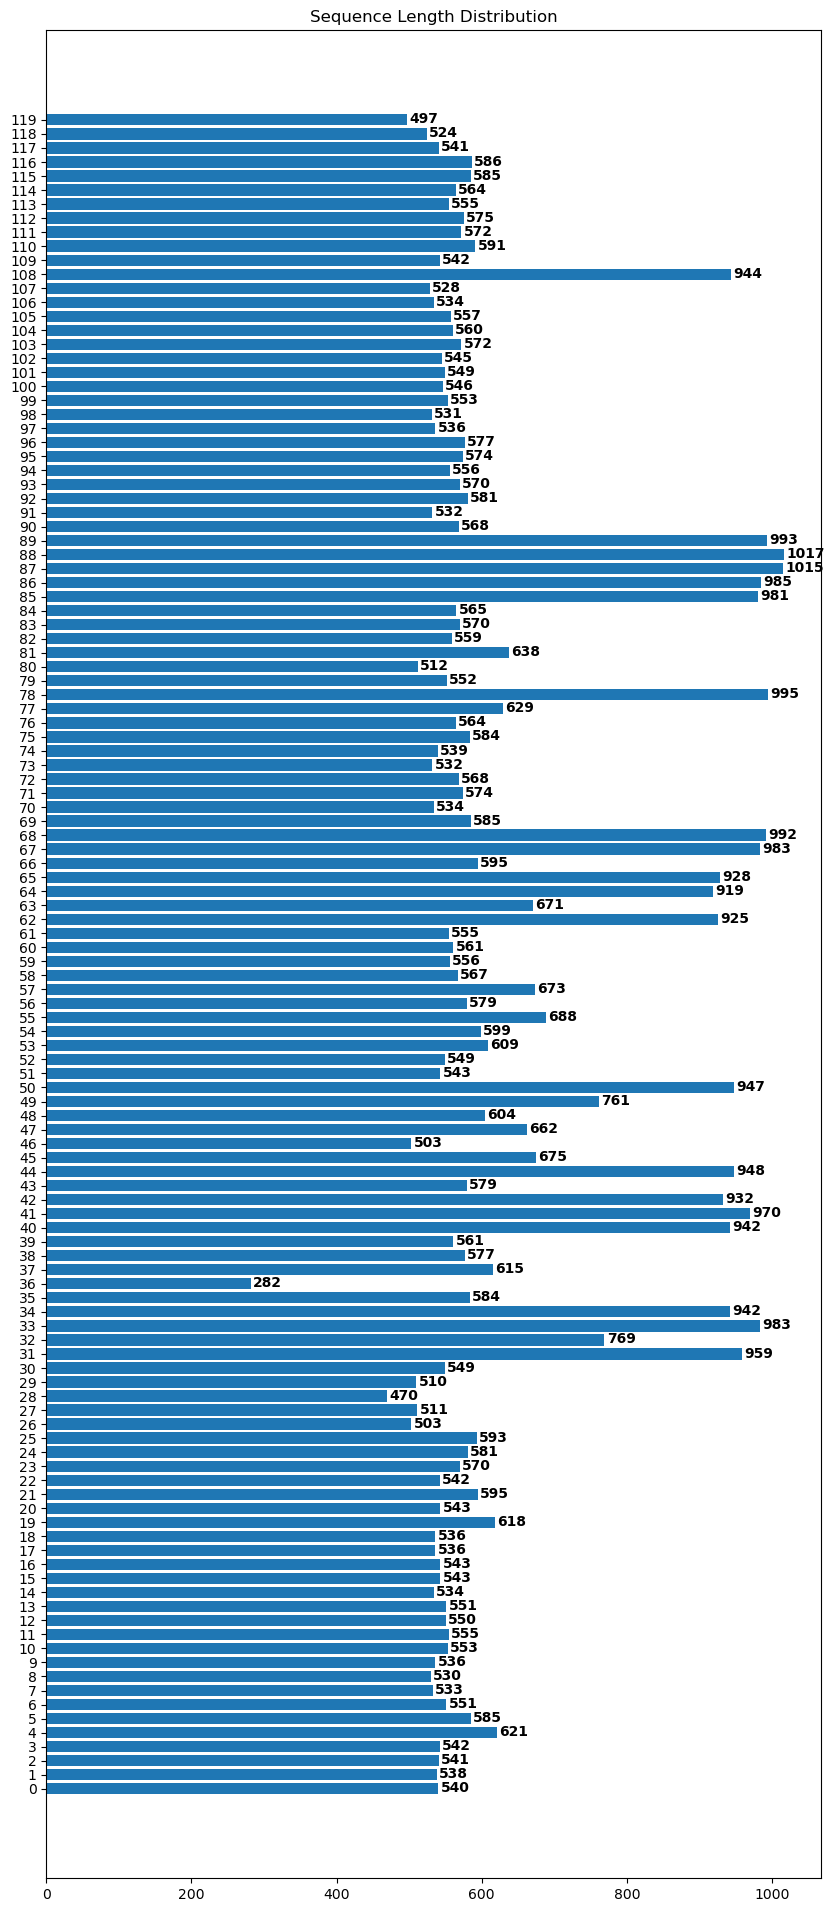

In [17]:
draw_bar_chart(total_sequence_length_distribution, title="Sequence Length Distribution")

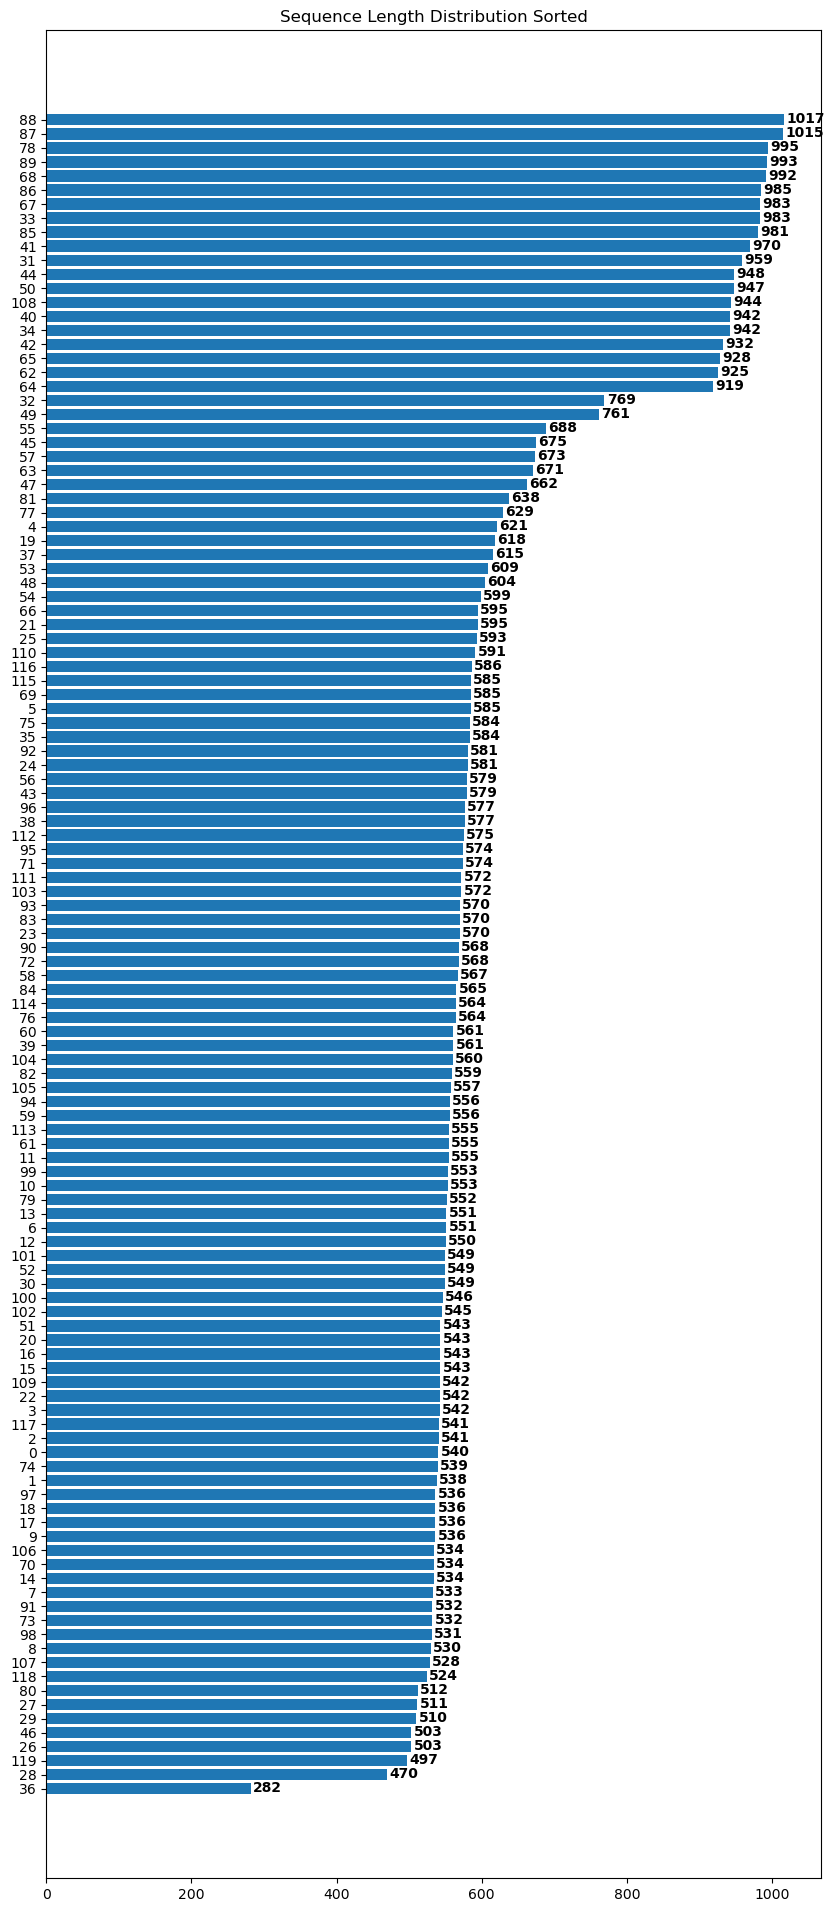

In [18]:
draw_bar_chart(dict(sorted(total_sequence_length_distribution.items(),key=lambda x:x[1])), title="Sequence Length Distribution Sorted")

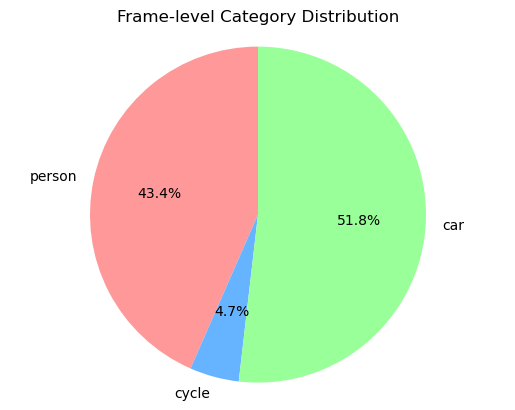

In [19]:
draw_pie_chart(total_category_distribution_frame_level_dict, title="Frame-level Category Distribution")

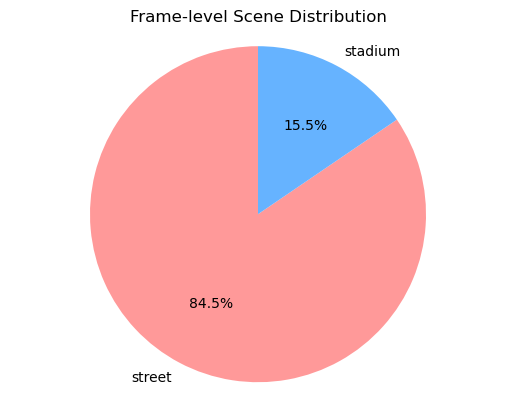

In [20]:
draw_pie_chart(total_scene_distribution_frame_level_dict, title="Frame-level Scene Distribution")

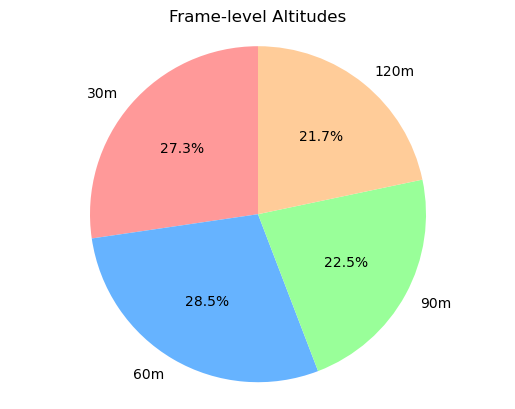

In [21]:
draw_pie_chart(total_altitude_distribution_frame_level_dict, title="Frame-level Altitudes")

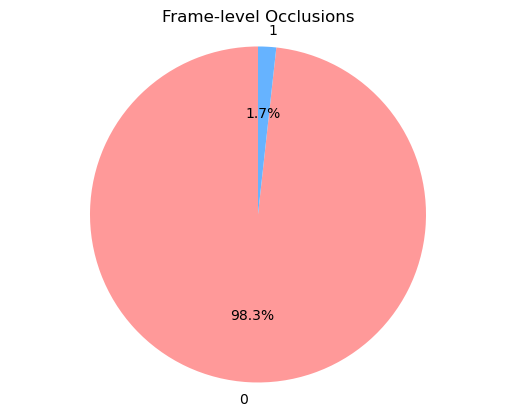

In [22]:
draw_pie_chart(total_occlusion_distribution_frame_level_dict, title="Frame-level Occlusions")

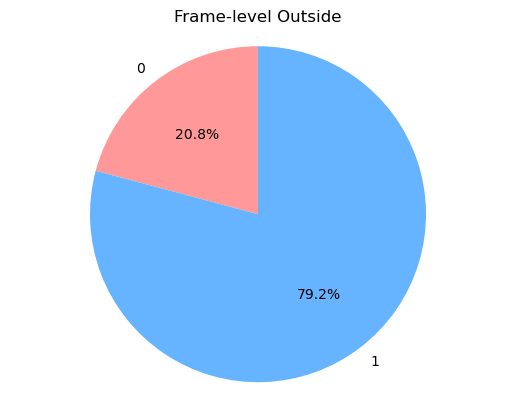

In [23]:
draw_pie_chart(total_outside_distribution_frame_level_dict, title="Frame-level Outside")

# Dataset Split

In [24]:
# get_dataset_split_list('D:\\Project_repository\\RGBT_multi_dataset\\DATASET_ROOT\\test.txt')

In [25]:
# with open('D:\\Project_repository\\RGBT_multi_dataset\\DATASET_ROOT\\all.txt','w') as f:
#     for i in range(120):
#         f.write(str(i)+'\n')

## Split

In [26]:
sequence_info_dict_list = []  # {"idx": int, "frames": int, "categories": Dict, "altitude": str}

for idx, xml_dict, xml_path in annot_dict_generator(dataset_root_dir, dataset_split_list):
    sequence_info_dict = {
        "idx": idx,
        "frames": count_frames_per_sequence(xml_dict),
        "categories": count_category_occurrences_frame_level_per_sequence(xml_dict),
        "altitude": {'30m': 0, '60m': 0, '90m': 0, '120m': 0}
    }
    sequence_info_dict['altitude'][xml_dict['altitude']] = sequence_info_dict['frames']
    sequence_info_dict_list.append(sequence_info_dict)

for i, sequence_info_dict in enumerate(sequence_info_dict_list):
    assert sequence_info_dict['idx'] == i

In [27]:
## ----------------------------------------------------------------------------------------------------------
train_prop = 0.6
val_prop = 0.1
test_prop = 0.3

train_frames_tg = int(total_frames * train_prop + 0.5)  # target train frames
val_frames_tg = int(total_frames * val_prop + 0.5)  # target val frames
test_frames_tg = int(total_frames * test_prop + 0.5)  # target test frames

total_category_count = sum(total_category_distribution_frame_level_dict.values())
category_proportion = {category: total_category_distribution_frame_level_dict[category] / total_category_count for category in total_category_distribution_frame_level_dict}

altitudes_proportion = {altitude: total_altitude_distribution_frame_level_dict[altitude] / total_frames for altitude in total_altitude_distribution_frame_level_dict}

In [28]:
# the target number of frames for each altitude
train_altitude_count_tg = {altitude: int(train_frames_tg * altitudes_proportion[altitude] + 0.5) for altitude in altitudes_proportion}
val_altitude_count_tg = {altitude: int(val_frames_tg * altitudes_proportion[altitude] + 0.5) for altitude in altitudes_proportion}
test_altitude_count_tg = {altitude: int(test_frames_tg * altitudes_proportion[altitude] + 0.5) for altitude in altitudes_proportion}

train_category_count_tg = {category: int(train_prop * total_category_distribution_frame_level_dict[category] + 0.5) for category in category_proportion}
val_category_count_tg = {category: int(val_prop * total_category_distribution_frame_level_dict[category] + 0.5) for category in category_proportion}
test_category_count_tg = {category: int(test_prop * total_category_distribution_frame_level_dict[category] + 0.5) for category in category_proportion}

In [29]:
print(f"train_category_count_tg:{train_category_count_tg}")
print(f"val_category_count_tg:{val_category_count_tg}")
print(f"test_category_count_tg:{test_category_count_tg}")

train_category_count_tg:{'person': 1603840, 'cycle': 175244, 'car': 1914183}
val_category_count_tg:{'person': 267307, 'cycle': 29207, 'car': 319031}
test_category_count_tg:{'person': 801920, 'cycle': 87622, 'car': 957092}


In [30]:
# DEBUG only
# sum three altitude count target
train_altitude_count_tg_sum = sum(train_altitude_count_tg.values())
val_altitude_count_tg_sum = sum(val_altitude_count_tg.values())
test_altitude_count_tg_sum = sum(test_altitude_count_tg.values())

# sum three category count target
train_category_count_tg_sum = sum(train_category_count_tg.values())
val_category_count_tg_sum = sum(val_category_count_tg.values())
test_category_count_tg_sum = sum(test_category_count_tg.values())

sum_cat = train_category_count_tg_sum + val_category_count_tg_sum + test_category_count_tg_sum
sum_alt = train_altitude_count_tg_sum + val_altitude_count_tg_sum + test_altitude_count_tg_sum

print("sum_cat: ", sum_cat)
print("sum total_category_distribution_frame_level_dict", sum(total_category_distribution_frame_level_dict.values()))
print("sum_alt: ", sum_alt)

sum_cat:  6155446
sum total_category_distribution_frame_level_dict 6155446
sum_alt:  75826


In [31]:
from queue import PriorityQueue

sorted_sequences_dict = dict(sorted(total_sequence_length_distribution.items(), key=lambda x: x[1], reverse=True))

sorted_sequences_idx_list = list(sorted_sequences_dict.keys())  # iterate from longest to shortest
sorted_sequences_idx_list = [int(idx) for idx in sorted_sequences_idx_list]
frames_len_list = list(sorted_sequences_dict.values())

In [32]:
# draw_pie_chart(train_category_count_tg, title="train_category_count_tg")
# draw_pie_chart(val_category_count_tg, title="val_category_count_tg")
# draw_pie_chart(test_category_count_tg, title="test_category_count_tg")

# print(f"train_category_count_tg:{train_category_count_tg}")
# print(f"val_category_count_tg:{val_category_count_tg}")
# print(f"test_category_count_tg:{test_category_count_tg}")

In [33]:
sequence_info_dict_list[sorted_sequences_idx_list[0]]['categories']

{'person': 57969, 'car': 10170, 'cycle': 2034}

In [34]:
# node structure: (['train'|'val'|'test', ...],
# (train frames, ...)
# (train_category_count_dict,val_category_count_dict, test_category_count_dict),
# (altitude_count_dict))

def heuristic(node, tolerances, coefficients, train_tg, val_tg, test_tg):
    """
    the heuristic function for A* search, the lower, the better
    """
    frames_tolerance, category_tolerance, altitude_tolerance = tolerances
    # normalize the coefficients
    _coefficients = [c / sum(coefficients) for c in coefficients]
    frames_coefficient, category_coefficient, altitude_coefficient = _coefficients

    train_frames_tg, train_category_count_tg, train_altitude_count_tg = train_tg
    val_frames_tg, val_category_count_tg, val_altitude_count_tg = val_tg
    test_frames_tg, test_category_count_tg, test_altitude_count_tg = test_tg

    node_train_frames, node_val_frames, node_test_frames = node[1]
    node_train_category_count, node_val_category_count, node_test_category_count = node[2]
    node_train_altitude_count, node_val_altitude_count, node_test_altitude_count = node[3]

    # if frames are too much, return inf
    if node_train_frames > train_frames_tg * (1 + frames_tolerance) or \
            node_val_frames > val_frames_tg * (1 + frames_tolerance) or \
            node_test_frames > test_frames_tg * (1 + frames_tolerance):
        # print('prune: frames')
        return 999

    # if category counts exceed target too much, return inf
    for category in node_train_category_count:
        if node_train_category_count[category] > train_category_count_tg[category] * (1 + category_tolerance) or \
                node_val_category_count[category] > val_category_count_tg[category] * (1 + category_tolerance) or \
                node_test_category_count[category] > test_category_count_tg[category] * (1 + category_tolerance):
            # print('prune: category')
            return 999

    # if altitude counts exceed target too much, return inf
    for altitude in node_train_altitude_count:
        if node_train_altitude_count[altitude] > train_altitude_count_tg[altitude] * (1 + altitude_tolerance) or \
                node_val_altitude_count[altitude] > val_altitude_count_tg[altitude] * (1 + altitude_tolerance) or \
                node_test_altitude_count[altitude] > test_altitude_count_tg[altitude] * (1 + altitude_tolerance):
            # print('prune: altitude')
            return 999

    # heuristic
    frames_prop_score = abs(node_train_frames / train_frames_tg - 1) + \
                        abs(node_val_frames / val_frames_tg - 1) + \
                        abs(node_test_frames / test_frames_tg - 1)
    category_prop_score = sum(abs(node_train_category_count[category] / train_category_count_tg[category] - 1) + \
    abs(node_val_category_count[category] / val_category_count_tg[category] - 1) + \
    abs(node_test_category_count[category] / test_category_count_tg[category] - 1) for category in node_train_category_count)

    altitude_prop_score = sum(abs(node_train_altitude_count[altitude] / train_altitude_count_tg[altitude] - 1) + \
        abs(node_val_altitude_count[altitude] / val_altitude_count_tg[altitude] - 1) + \
        abs(node_test_altitude_count[altitude] / test_altitude_count_tg[altitude] - 1) for altitude in node_train_altitude_count)

    return frames_coefficient*frames_prop_score + category_coefficient * category_prop_score + altitude_coefficient * altitude_prop_score


In [35]:
max_solution_cnt = 100
result_queue = PriorityQueue()


tolerances = (2, 0.2, 0.2)
coefficients = (0, 1, 0.5)

last_best_heuristic = 9999999999999999999
h_tolerance = 0.5

# iter order: val, test, train
priority_queue = PriorityQueue()

# first node is val
first_node1 = (['val'], (0, sequence_info_dict_list[sorted_sequences_idx_list[0]]['frames'], 0),  # frames count
              ({'person': 0, 'cycle': 0, 'car': 0},  # train_category_count_dict
               sequence_info_dict_list[sorted_sequences_idx_list[0]]['categories'],  # val_category_count_dict
               {'person': 0, 'cycle': 0, 'car': 0},),  # test_category_count_dict
              ({'30m': 0, '60m': 0, '90m': 0, '120m': 0},  # train altitude_count_dict
               sequence_info_dict_list[sorted_sequences_idx_list[0]]['altitude'],  # val altitude_count_dict
               {'30m': 0, '60m': 0, '90m': 0, '120m': 0}))  # test altitude_count_dict

priority_queue.put(
    (heuristic(first_node1, tolerances,coefficients, (train_frames_tg, train_category_count_tg, train_altitude_count_tg),
               (val_frames_tg, val_category_count_tg, val_altitude_count_tg),
               (test_frames_tg, test_category_count_tg, test_altitude_count_tg)), first_node1))

# first node is test
first_node2 = (['test'], (0, 0, sequence_info_dict_list[sorted_sequences_idx_list[0]]['frames']),  # frames count
                ({'person': 0, 'cycle': 0, 'car': 0},  # train_category_count_dict
                    {'person': 0, 'cycle': 0, 'car': 0},  # val_category_count_dict
                    sequence_info_dict_list[sorted_sequences_idx_list[0]]['categories'],),  # test_category_count_dict
                ({'30m': 0, '60m': 0, '90m': 0, '120m': 0},  # train altitude_count_dict
                    {'30m': 0, '60m': 0, '90m': 0, '120m': 0},  # val altitude_count_dict
                    sequence_info_dict_list[sorted_sequences_idx_list[0]]['altitude'],))  # test altitude_count_dict

priority_queue.put(
    (heuristic(first_node2, tolerances,coefficients, (train_frames_tg, train_category_count_tg, train_altitude_count_tg),
                (val_frames_tg, val_category_count_tg, val_altitude_count_tg),
                (test_frames_tg, test_category_count_tg, test_altitude_count_tg)), first_node2))

# first node is train
first_node3 = (['train'], (sequence_info_dict_list[sorted_sequences_idx_list[0]]['frames'], 0, 0),  # frames count
                (sequence_info_dict_list[sorted_sequences_idx_list[0]]['categories'],  # train_category_count_dict
                    {'person': 0, 'cycle': 0, 'car': 0},  # val_category_count_dict
                    {'person': 0, 'cycle': 0, 'car': 0},),  # test_category_count_dict
                (sequence_info_dict_list[sorted_sequences_idx_list[0]]['altitude'],  # train altitude_count_dict
                    {'30m': 0, '60m': 0, '90m': 0, '120m': 0},  # val altitude_count_dict
                    {'30m': 0, '60m': 0, '90m': 0, '120m': 0},))  # test altitude_count_dict

priority_queue.put(
    (heuristic(first_node3, tolerances,coefficients, (train_frames_tg, train_category_count_tg, train_altitude_count_tg),
                (val_frames_tg, val_category_count_tg, val_altitude_count_tg),
                (test_frames_tg, test_category_count_tg, test_altitude_count_tg)), first_node3))


iter_cnt = 0
# A search
while not priority_queue.empty():
    iter_cnt += 1
    if iter_cnt % 10000 == 0:
        print(f'iter_cnt: {iter_cnt}, result_queue: {result_queue.qsize()}')

    current_node = priority_queue.get()[1]
    current_split_list = current_node[0]  # ['train'|'val'|'test', ...]
    current_node_train_frames, current_node_val_frames, current_node_test_frames = current_node[
        1]
    current_node_train_category_count, current_node_val_category_count, current_node_test_category_count = current_node[
        2]
    current_node_train_altitude_count, current_node_val_altitude_count, current_node_test_altitude_count = current_node[
        3]

    # if current node is the last one, break
    if len(current_split_list) == len(sorted_sequences_idx_list):
        hs = heuristic(current_node, tolerances,coefficients, (train_frames_tg, train_category_count_tg, train_altitude_count_tg),
                                    (val_frames_tg, val_category_count_tg, val_altitude_count_tg),
                                    (test_frames_tg, test_category_count_tg, test_altitude_count_tg))
        result_queue.put((hs, current_node))
        if hs < last_best_heuristic:
            last_best_heuristic = hs
            print(f'last_best_heuristic: {last_best_heuristic}')
        continue

    # if current node is not the last one, add next node to priority queue
    next_node_idx = len(current_node[0])

    next_node1 = (current_split_list + ['val'],
                 (current_node_train_frames, current_node_val_frames + frames_len_list[next_node_idx],
                  current_node_test_frames),
                 (current_node_train_category_count,
                  merge_dicts(current_node_val_category_count,
                              sequence_info_dict_list[sorted_sequences_idx_list[next_node_idx]]['categories']),
                  current_node_test_category_count),
                 (current_node_train_altitude_count,
                  merge_dicts(current_node_val_altitude_count,
                              sequence_info_dict_list[sorted_sequences_idx_list[next_node_idx]]['altitude']),
                  current_node_test_altitude_count))
    h1 = heuristic(next_node1, tolerances,coefficients, (train_frames_tg, train_category_count_tg, train_altitude_count_tg),
                   (val_frames_tg, val_category_count_tg, val_altitude_count_tg),
                   (test_frames_tg, test_category_count_tg, test_altitude_count_tg))
    if h1 <= last_best_heuristic + h_tolerance:
        priority_queue.put((h1, next_node1))

    next_node2 = (current_split_list + ['test'],
                 (current_node_train_frames, current_node_val_frames,
                  current_node_test_frames + frames_len_list[next_node_idx]),
                 (current_node_train_category_count, current_node_val_category_count,
                  merge_dicts(current_node_test_category_count, sequence_info_dict_list[sorted_sequences_idx_list[next_node_idx]]['categories'])),
                 (current_node_train_altitude_count, current_node_val_altitude_count,
                  merge_dicts(current_node_test_altitude_count, sequence_info_dict_list[sorted_sequences_idx_list[next_node_idx]]['altitude'])))
    h2 = heuristic(next_node2, tolerances,coefficients, (train_frames_tg, train_category_count_tg, train_altitude_count_tg),
                     (val_frames_tg, val_category_count_tg, val_altitude_count_tg),
                        (test_frames_tg, test_category_count_tg, test_altitude_count_tg))
    if h2 <= last_best_heuristic + h_tolerance:
        priority_queue.put((h2, next_node2))

    next_node3 = (current_split_list + ['train'],
                 (current_node_train_frames + frames_len_list[next_node_idx], current_node_val_frames,
                  current_node_test_frames),
                 (merge_dicts(current_node_train_category_count, sequence_info_dict_list[sorted_sequences_idx_list[next_node_idx]]['categories']), current_node_val_category_count,
                  current_node_test_category_count),
                 (merge_dicts(current_node_train_altitude_count, sequence_info_dict_list[sorted_sequences_idx_list[next_node_idx]]['altitude']), current_node_val_altitude_count,
                  current_node_test_altitude_count))
    h3 = heuristic(next_node3, tolerances,coefficients, (train_frames_tg, train_category_count_tg, train_altitude_count_tg),
                        (val_frames_tg, val_category_count_tg, val_altitude_count_tg),
                        (test_frames_tg, test_category_count_tg, test_altitude_count_tg))
    if h3 <= last_best_heuristic + h_tolerance:
        priority_queue.put((h3, next_node3))

    # print(f"h1: {h1}, h2: {h2}, h3: {h3}")
    # print(f'\r{len(current_split_list)} / 120')
print(f'done with {iter_cnt} iterations, found {result_queue.qsize()} results')

last_best_heuristic: 0.6910969184035577
done with 2245 iterations, found 662 results


(['val', 'val', 'test', 'test', 'test', 'test', 'val', 'test', 'test', 'val', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'train', 'train', 'train', 'test', 'train', 'train', 'train', 'train', 'train', 'train', 'train', 'train', 'test', 'val', 'train', 'train', 'train', 'train', 'val', 'test', 'test', 'val', 'val', 'test', 'train', 'val', 'train', 'train', 'test', 'test', 'train', 'train', 'train', 'test', 'test', 'train', 'train', 'test', 'test', 'val', 'train', 'train', 'train', 'test', 'train', 'train', 'train', 'train', 'train', 'train', 'test', 'train', 'train', 'train', 'train', 'test', 'train', 'train', 'test', 'train', 'train', 'test', 'test', 'train', 'train', 'train', 'train', 'train', 'train', 'train', 'train', 'train', 'train', 'train', 'train', 'train', 'train', 'train', 'train', 'train', 'train', 'train', 'train', 'train', 'train', 'train', 'train', 'train', 'train', 'train', 'train', 'train', 'train', 'train', 'train', 'train', 'train', 'train', 'train', 'tra

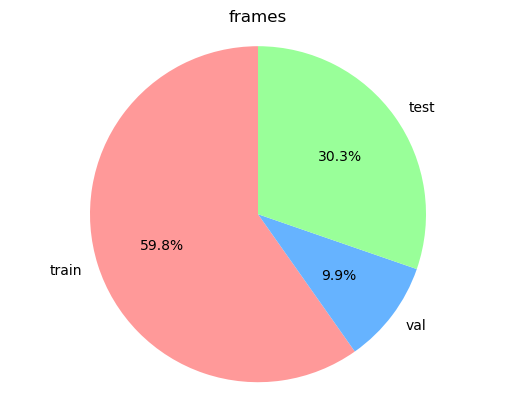

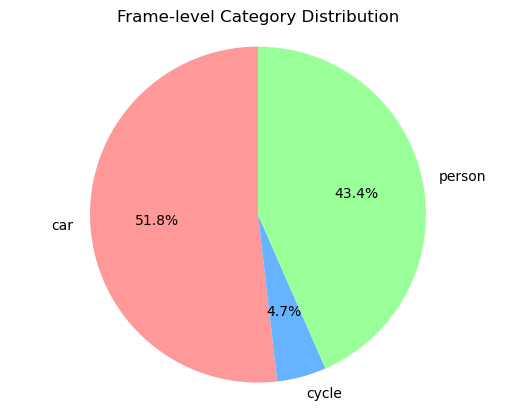

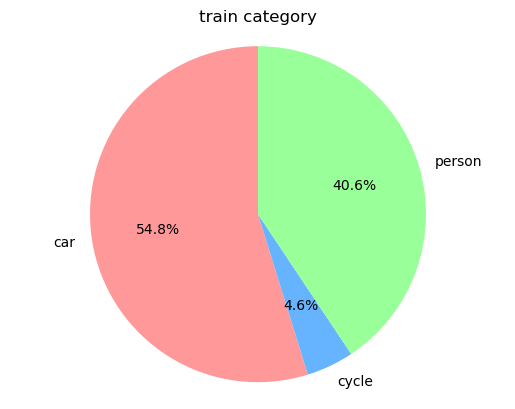

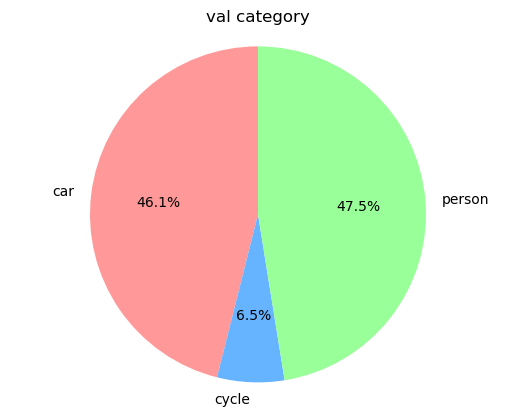

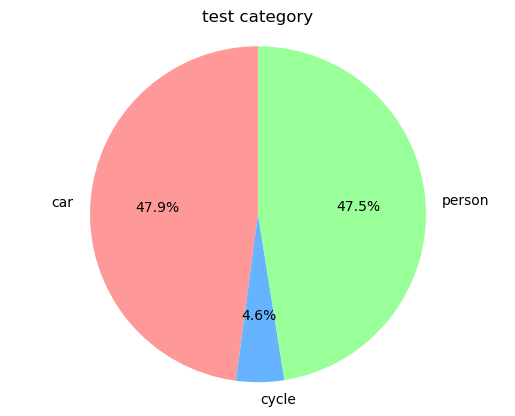

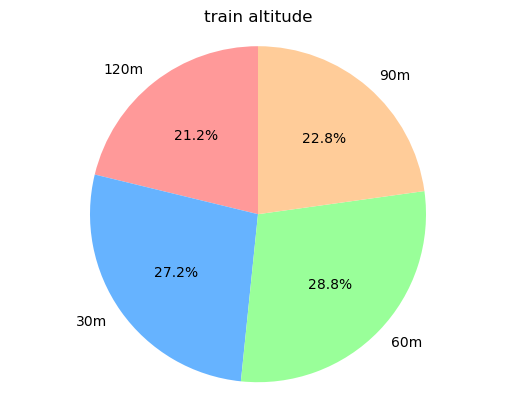

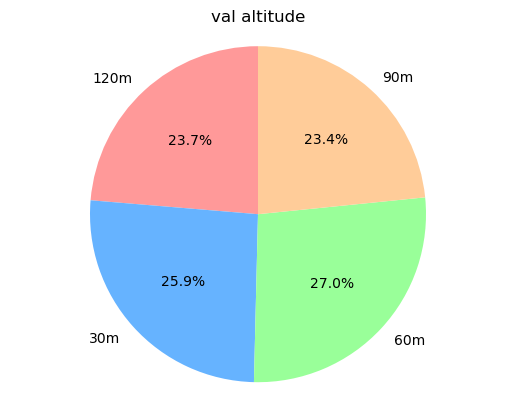

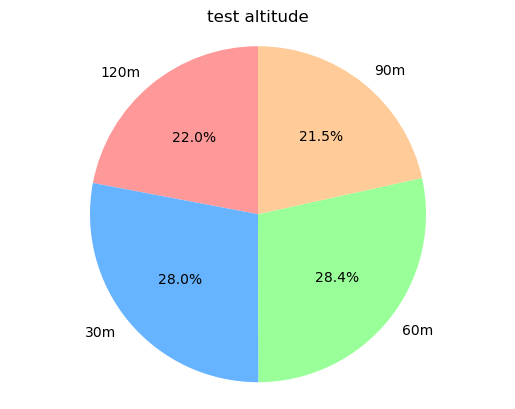

In [36]:
# get the last node
last_node = result_queue.get()[1]
print(last_node)
# print(len(last_node[0]))

# print heuristic value
print("result heuristic:",heuristic(last_node, tolerances, coefficients, (train_frames_tg, train_category_count_tg, train_altitude_count_tg),
                (val_frames_tg, val_category_count_tg, val_altitude_count_tg),
                (test_frames_tg, test_category_count_tg, test_altitude_count_tg)))
train_frames, val_frames, test_frames = last_node[1]
train_category_count, val_category_count, test_category_count = last_node[2]
train_altitude_count, val_altitude_count, test_altitude_count = last_node[3]

# sort each dict by key
total_category_distribution_frame_level_dict = dict(sorted(total_category_distribution_frame_level_dict.items()))
train_category_count = dict(sorted(train_category_count.items()))
val_category_count = dict(sorted(val_category_count.items()))
test_category_count = dict(sorted(test_category_count.items()))
total_altitude_distribution_frame_level_dict = dict(sorted(total_altitude_distribution_frame_level_dict.items()))
train_altitude_count = dict(sorted(train_altitude_count.items()))
val_altitude_count = dict(sorted(val_altitude_count.items()))
test_altitude_count = dict(sorted(test_altitude_count.items()))

print("train_frames:", train_frames)
print("val_frames:", val_frames)
print("test_frames:", test_frames)

print("total_category_distribution_frame_level_dict:", total_category_distribution_frame_level_dict)
print("train_category_count:", train_category_count)
print("val_category_count:", val_category_count)
print("test_category_count:", test_category_count)


print('total_altitude_distribution_frame_level_dict:', total_altitude_distribution_frame_level_dict)
print("train_altitude_count:", train_altitude_count)
print("val_altitude_count:", val_altitude_count)
print("test_altitude_count:", test_altitude_count)

draw_pie_chart({'train': train_frames, 'val': val_frames, 'test': test_frames}, 'frames')
draw_pie_chart(total_category_distribution_frame_level_dict, title="Frame-level Category Distribution")
draw_pie_chart(train_category_count, 'train category')
draw_pie_chart(val_category_count, 'val category')
draw_pie_chart(test_category_count, 'test category')
draw_pie_chart(train_altitude_count, 'train altitude')
draw_pie_chart(val_altitude_count, 'val altitude')
draw_pie_chart(test_altitude_count, 'test altitude')

In [37]:
# random.seed(1)
#
# def random_dic(dicts):
#     dict_key_ls = list(dicts.keys())
#     random.shuffle(dict_key_ls)
#     new_dic = {}
#     for key in dict_key_ls:
#         new_dic[key] = dicts.get(key)
#     return new_dic
#
# # shuffled_thermal_len_dict = dict(sorted(total_sequence_length_distribution.items(),key=lambda x:x[1]))
# shuffled_thermal_len_dict = random_dic(total_sequence_length_distribution)  # shuffled, don't use sorted
# # count total
# total = 0
# for key, val in shuffled_thermal_len_dict.items():
#     total += val
#
# # proportion， 12:6:1
# train_num = int(total * 0.632 + 0.5)
# val_num = int(total * 0.316 + 0.5)
# test_num = total - train_num - val_num
#
# train_list = []
# val_list = []
# test_list = []
# for key, val in shuffled_thermal_len_dict.items():
#     if train_num > 0 and train_num - val >= 0:  # if training set is not full
#         train_list.append(f'{key}\n')
#         train_num -= val
#     elif val_num > 0 and val_num - val >= 0:  # val
#         val_list.append(f'{key}\n')
#         val_num -= val
#     else:  # test
#         test_list.append(f'{key}\n')
#
# train_txt_path = os.path.join(dataset_root_dir,'train.txt')
# val_txt_path = os.path.join(dataset_root_dir,'val.txt')
# test_txt_path = os.path.join(dataset_root_dir,'test.txt')
#
# with open(train_txt_path, 'w') as f:
#     f.writelines(train_list)
# with open(val_txt_path, 'w') as f:
#     f.writelines(val_list)
# with open(test_txt_path, 'w') as f:
#     f.writelines(test_list)

In [38]:
# sourcery skip: raise-specific-error
partition_list = last_node[0]
train_list = []
val_list = []
test_list = []

for i, partition in enumerate(partition_list):
    if partition == 'train':
        train_list.append(f'{sorted_sequences_idx_list[i]}\n')
    elif partition == 'val':
        val_list.append(f'{sorted_sequences_idx_list[i]}\n')
    elif partition == 'test':
        test_list.append(f'{sorted_sequences_idx_list[i]}\n')
    else:
        raise Exception("partition error")

train_txt_path = os.path.join(dataset_root_dir,'train.txt')
val_txt_path = os.path.join(dataset_root_dir,'val.txt')
test_txt_path = os.path.join(dataset_root_dir,'test.txt')

with open(train_txt_path, 'w') as f:
    f.writelines(train_list)
with open(val_txt_path, 'w') as f:
    f.writelines(val_list)
with open(test_txt_path, 'w') as f:
    f.writelines(test_list)

## Statistics

### Train

In [39]:
train_video_sequences = 0
train_frames = 0

train_category_distribution_frame_level_dict = {}

train_sequence_length_distribution = {}

train_outside_distribution_frame_level_dict = {}
train_occlusion_distribution_frame_level_dict = {}
train_altitude_distribution_frame_level_dict = {}
train_illumination_distribution_frame_level_dict = {}
train_scene_distribution_frame_level_dict = {}

In [40]:
dataset_split_list = get_dataset_split_list(os.path.join(dataset_root_dir,'train.txt'))
for idx, xml_dict, xml_path in annot_dict_generator(dataset_root_dir, dataset_split_list):
    # if count >= 30:
    #     break # for debug only
    try:
        # frames number update---------------------------------------------------------------------------------
        train_video_sequences += 1
        frames = count_frames_per_sequence(xml_dict)
        train_frames += frames
        train_sequence_length_distribution[f'{idx}'] = frames
        # frame-level category distribution--------------------------------------------------------------------
        category_count_frame_level_dict = count_category_occurrences_frame_level_per_sequence(xml_dict)
        train_category_distribution_frame_level_dict = merge_dicts(
            train_category_distribution_frame_level_dict,
            category_count_frame_level_dict
        )
        # frame-level attribute distribution--------------------------------------------------------------------
        outside_distribution_frame_level_dict, occlusion_distribution_frame_level_dict, altitude_distribution_frame_level_dict, illumination_distribution_frame_level_dict, scene_distribution_frame_level_dict = count_attribute_occurrence_frame_level_per_sequence(
            xml_dict)
    except Exception as e:
        print("\033[1;31merror\033[0m")  # print bold "error" in red
        traceback.print_exc()
        print(f"xml file:{xml_path}")

    train_outside_distribution_frame_level_dict = merge_dicts(train_outside_distribution_frame_level_dict,
                                                              outside_distribution_frame_level_dict)
    train_occlusion_distribution_frame_level_dict = merge_dicts(train_occlusion_distribution_frame_level_dict,
                                                                occlusion_distribution_frame_level_dict)
    train_altitude_distribution_frame_level_dict = merge_dicts(train_altitude_distribution_frame_level_dict,
                                                               altitude_distribution_frame_level_dict)
    train_illumination_distribution_frame_level_dict = merge_dicts(train_illumination_distribution_frame_level_dict,
                                                                   illumination_distribution_frame_level_dict)
    train_scene_distribution_frame_level_dict = merge_dicts(train_scene_distribution_frame_level_dict,
                                                            scene_distribution_frame_level_dict)

In [41]:
train_video_sequences

79

In [42]:
train_frames

45324

In [43]:
train_sequence_length_distribution

{'65': 928,
 '62': 925,
 '64': 919,
 '49': 761,
 '55': 688,
 '45': 675,
 '57': 673,
 '63': 671,
 '47': 662,
 '81': 638,
 '77': 629,
 '37': 615,
 '53': 609,
 '48': 604,
 '54': 599,
 '69': 585,
 '35': 584,
 '75': 584,
 '43': 579,
 '56': 579,
 '38': 577,
 '71': 574,
 '95': 574,
 '83': 570,
 '93': 570,
 '72': 568,
 '58': 567,
 '84': 565,
 '76': 564,
 '114': 564,
 '39': 561,
 '60': 561,
 '82': 559,
 '105': 557,
 '59': 556,
 '94': 556,
 '61': 555,
 '113': 555,
 '99': 553,
 '79': 552,
 '12': 550,
 '30': 549,
 '52': 549,
 '101': 549,
 '100': 546,
 '102': 545,
 '15': 543,
 '16': 543,
 '20': 543,
 '51': 543,
 '3': 542,
 '22': 542,
 '109': 542,
 '2': 541,
 '117': 541,
 '0': 540,
 '74': 539,
 '1': 538,
 '9': 536,
 '17': 536,
 '18': 536,
 '97': 536,
 '14': 534,
 '70': 534,
 '106': 534,
 '7': 533,
 '73': 532,
 '91': 532,
 '98': 531,
 '8': 530,
 '107': 528,
 '118': 524,
 '80': 512,
 '27': 511,
 '29': 510,
 '26': 503,
 '46': 503,
 '119': 497,
 '36': 282}

In [44]:
train_category_distribution_frame_level_dict

{'person': 1483472, 'car': 1999996, 'cycle': 166475}

In [45]:
train_altitude_distribution_frame_level_dict

{'30m': 12315, '60m': 13064, '90m': 10334, '120m': 9611}

In [46]:
train_illumination_distribution_frame_level_dict

{'bright_light': 44236, 'weak_light': 1088}

In [47]:
train_occlusion_distribution_frame_level_dict

{'0': 3605948, '1': 43995}

In [48]:
train_outside_distribution_frame_level_dict

{'0': 753020, '1': 2896923}

In [49]:
train_scene_distribution_frame_level_dict

{'street': 39001, 'stadium': 6323}

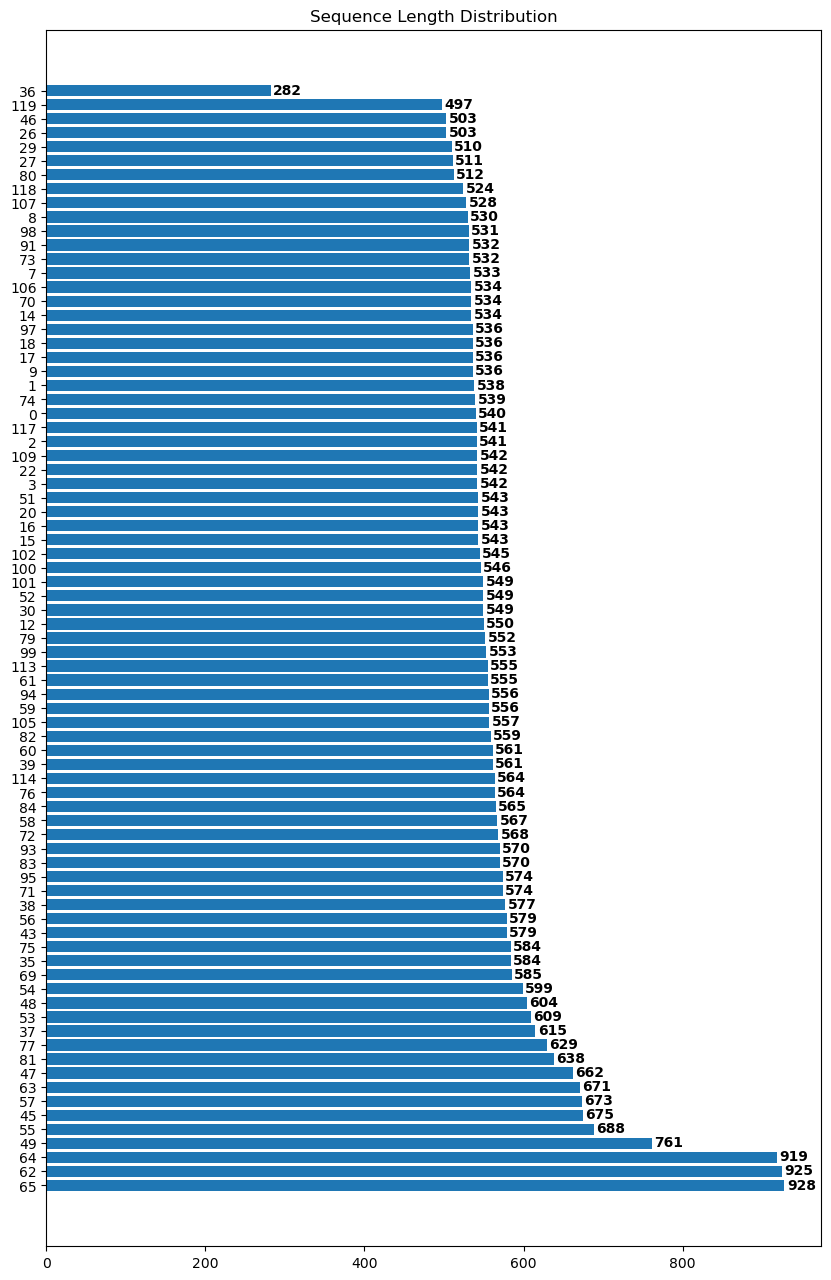

In [50]:
draw_bar_chart(train_sequence_length_distribution, title="Sequence Length Distribution")

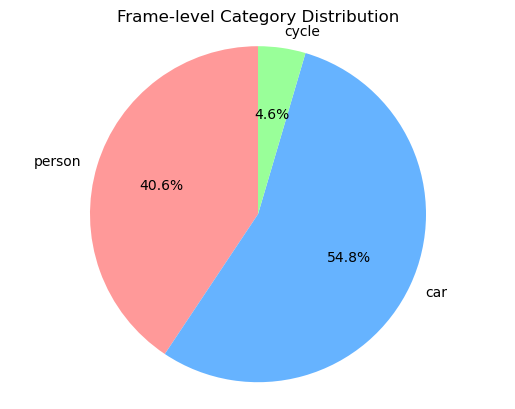

In [51]:
draw_pie_chart(train_category_distribution_frame_level_dict, title="Frame-level Category Distribution")

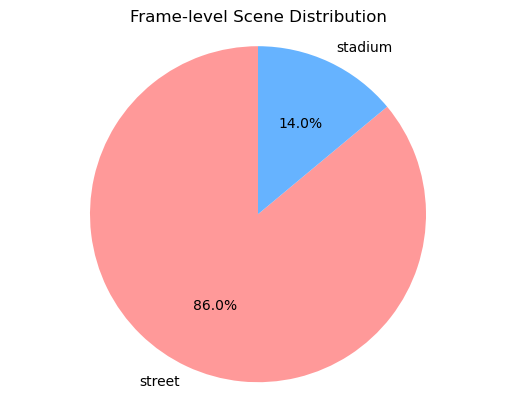

In [52]:
draw_pie_chart(train_scene_distribution_frame_level_dict, title="Frame-level Scene Distribution")

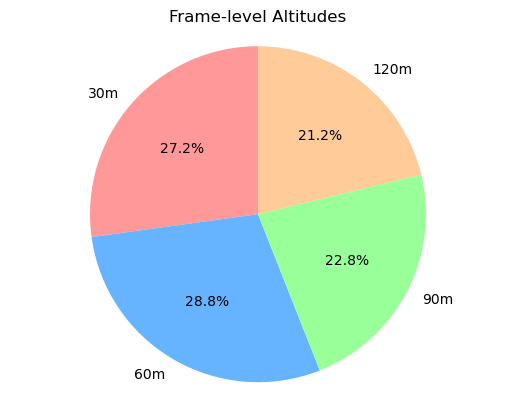

In [53]:
draw_pie_chart(train_altitude_distribution_frame_level_dict, title="Frame-level Altitudes")

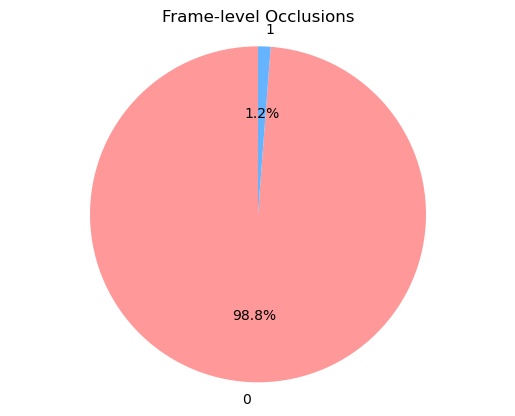

In [54]:
draw_pie_chart(train_occlusion_distribution_frame_level_dict, title="Frame-level Occlusions")

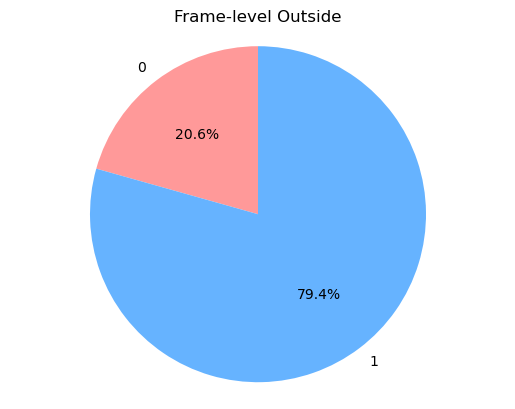

In [55]:
draw_pie_chart(train_outside_distribution_frame_level_dict, title="Frame-level Outside")

### Validation

In [56]:
val_video_sequences = 0
val_frames = 0

val_category_distribution_frame_level_dict = {}

val_sequence_length_distribution = {}

val_outside_distribution_frame_level_dict = {}
val_occlusion_distribution_frame_level_dict = {}
val_altitude_distribution_frame_level_dict = {}
val_illumination_distribution_frame_level_dict = {}
val_scene_distribution_frame_level_dict = {}

In [57]:
dataset_split_list = get_dataset_split_list(os.path.join(dataset_root_dir,'val.txt'))
for idx, xml_dict, xml_path in annot_dict_generator(dataset_root_dir, dataset_split_list):
    # if count >= 30:
    #     break # for debug only
    try:
        # frames number update---------------------------------------------------------------------------------
        val_video_sequences += 1
        frames = count_frames_per_sequence(xml_dict)
        val_frames += frames
        val_sequence_length_distribution[f'{idx}'] = frames
        # frame-level category distribution--------------------------------------------------------------------
        category_count_frame_level_dict = count_category_occurrences_frame_level_per_sequence(xml_dict)
        val_category_distribution_frame_level_dict = merge_dicts(
            val_category_distribution_frame_level_dict,
            category_count_frame_level_dict
        )
        # frame-level attribute distribution--------------------------------------------------------------------
        outside_distribution_frame_level_dict, occlusion_distribution_frame_level_dict, altitude_distribution_frame_level_dict, illumination_distribution_frame_level_dict, scene_distribution_frame_level_dict = count_attribute_occurrence_frame_level_per_sequence(
            xml_dict)
    except Exception as e:
        print("\033[1;31merror\033[0m")  # print bold "error" in red
        traceback.print_exc()
        print(f"xml file:{xml_path}")

    val_outside_distribution_frame_level_dict = merge_dicts(val_outside_distribution_frame_level_dict,
                                                              outside_distribution_frame_level_dict)
    val_occlusion_distribution_frame_level_dict = merge_dicts(val_occlusion_distribution_frame_level_dict,
                                                                occlusion_distribution_frame_level_dict)
    val_altitude_distribution_frame_level_dict = merge_dicts(val_altitude_distribution_frame_level_dict,
                                                               altitude_distribution_frame_level_dict)
    val_illumination_distribution_frame_level_dict = merge_dicts(val_illumination_distribution_frame_level_dict,
                                                                   illumination_distribution_frame_level_dict)
    val_scene_distribution_frame_level_dict = merge_dicts(val_scene_distribution_frame_level_dict,
                                                            scene_distribution_frame_level_dict)

In [58]:
val_video_sequences

10

In [59]:
val_frames

7530

In [60]:
val_sequence_length_distribution

{'88': 1017,
 '87': 1015,
 '33': 983,
 '41': 970,
 '19': 618,
 '21': 595,
 '110': 591,
 '116': 586,
 '115': 585,
 '23': 570}

In [61]:
val_category_distribution_frame_level_dict

{'person': 255612, 'car': 248161, 'cycle': 34769}

In [62]:
val_altitude_distribution_frame_level_dict

{'30m': 1953, '60m': 2032, '90m': 1762, '120m': 1783}

In [63]:
val_illumination_distribution_frame_level_dict

{'bright_light': 7530, 'weak_light': 0}

In [64]:
val_occlusion_distribution_frame_level_dict

{'0': 526624, '1': 11918}

In [65]:
val_outside_distribution_frame_level_dict

{'0': 111423, '1': 427119}

In [66]:
val_scene_distribution_frame_level_dict

{'street': 5929, 'stadium': 1601}

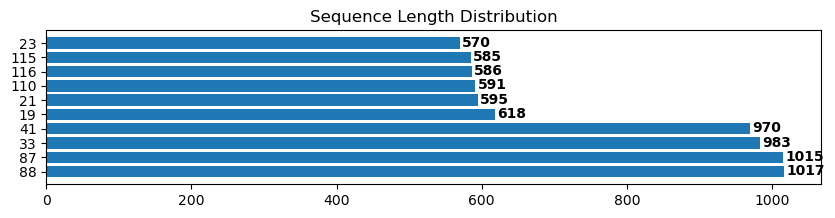

In [67]:
draw_bar_chart(val_sequence_length_distribution, title="Sequence Length Distribution")

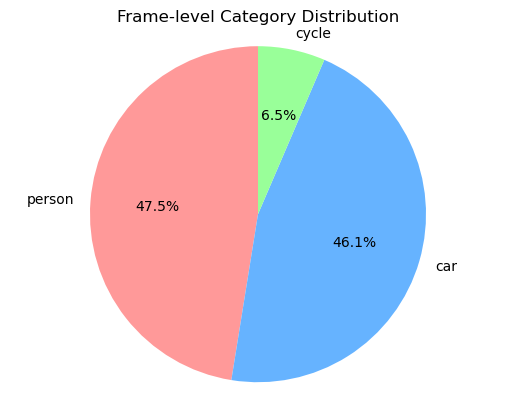

In [68]:
draw_pie_chart(val_category_distribution_frame_level_dict, title="Frame-level Category Distribution")

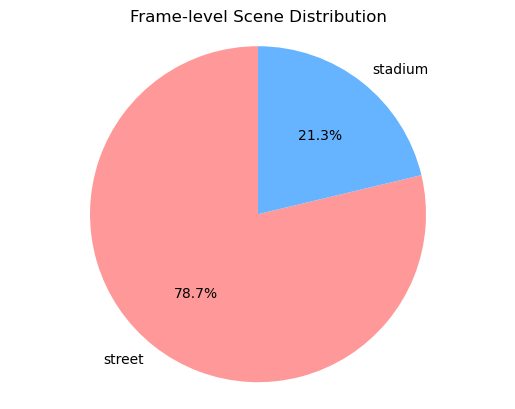

In [69]:
draw_pie_chart(val_scene_distribution_frame_level_dict, title="Frame-level Scene Distribution")

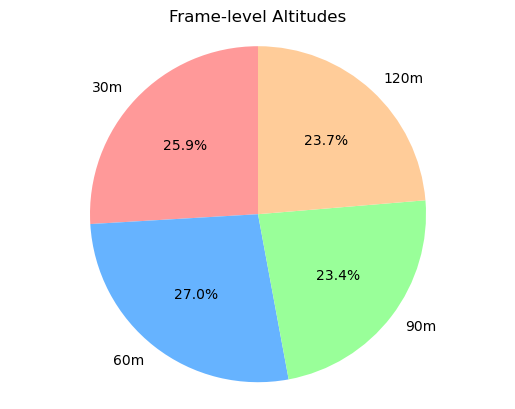

In [70]:
draw_pie_chart(val_altitude_distribution_frame_level_dict, title="Frame-level Altitudes")

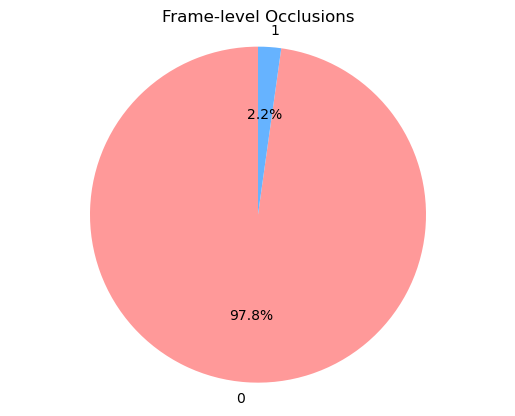

In [71]:
draw_pie_chart(val_occlusion_distribution_frame_level_dict, title="Frame-level Occlusions")

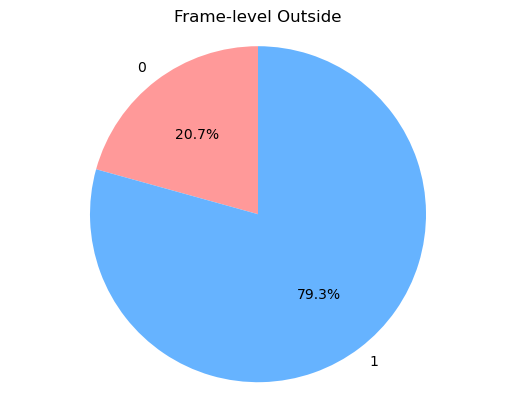

In [72]:
draw_pie_chart(val_outside_distribution_frame_level_dict, title="Frame-level Outside")

### Test

In [73]:
test_video_sequences = 0
test_frames = 0

test_category_distribution_frame_level_dict = {}

test_sequence_length_distribution = {}

test_outside_distribution_frame_level_dict = {}
test_occlusion_distribution_frame_level_dict = {}
test_altitude_distribution_frame_level_dict = {}
test_illumination_distribution_frame_level_dict = {}
test_scene_distribution_frame_level_dict = {}

In [74]:
dataset_split_list = get_dataset_split_list(os.path.join(dataset_root_dir,'test.txt'))
for idx, xml_dict, xml_path in annot_dict_generator(dataset_root_dir, dataset_split_list):
    # if count >= 30:
    #     break # for debug only
    try:
        # frames number update---------------------------------------------------------------------------------
        test_video_sequences += 1
        frames = count_frames_per_sequence(xml_dict)
        test_frames += frames
        test_sequence_length_distribution[f'{idx}'] = frames
        # frame-level category distribution--------------------------------------------------------------------
        category_count_frame_level_dict = count_category_occurrences_frame_level_per_sequence(xml_dict)
        test_category_distribution_frame_level_dict = merge_dicts(
            test_category_distribution_frame_level_dict,
            category_count_frame_level_dict
        )
        # frame-level attribute distribution--------------------------------------------------------------------
        outside_distribution_frame_level_dict, occlusion_distribution_frame_level_dict, altitude_distribution_frame_level_dict, illumination_distribution_frame_level_dict, scene_distribution_frame_level_dict = count_attribute_occurrence_frame_level_per_sequence(
            xml_dict)
    except Exception as e:
        print("\033[1;31merror\033[0m")  # print bold "error" in red
        traceback.print_exc()
        print(f"xml file:{xml_path}")

    test_outside_distribution_frame_level_dict = merge_dicts(test_outside_distribution_frame_level_dict,
                                                              outside_distribution_frame_level_dict)
    test_occlusion_distribution_frame_level_dict = merge_dicts(test_occlusion_distribution_frame_level_dict,
                                                                occlusion_distribution_frame_level_dict)
    test_altitude_distribution_frame_level_dict = merge_dicts(test_altitude_distribution_frame_level_dict,
                                                               altitude_distribution_frame_level_dict)
    test_illumination_distribution_frame_level_dict = merge_dicts(test_illumination_distribution_frame_level_dict,
                                                                   illumination_distribution_frame_level_dict)
    test_scene_distribution_frame_level_dict = merge_dicts(test_scene_distribution_frame_level_dict,
                                                            scene_distribution_frame_level_dict)

In [75]:
test_video_sequences

31

In [76]:
test_frames

22972

In [77]:
test_sequence_length_distribution

{'78': 995,
 '89': 993,
 '68': 992,
 '86': 985,
 '67': 983,
 '85': 981,
 '31': 959,
 '44': 948,
 '50': 947,
 '108': 944,
 '34': 942,
 '40': 942,
 '42': 932,
 '32': 769,
 '4': 621,
 '66': 595,
 '25': 593,
 '5': 585,
 '24': 581,
 '92': 581,
 '96': 577,
 '112': 575,
 '103': 572,
 '111': 572,
 '90': 568,
 '104': 560,
 '11': 555,
 '10': 553,
 '6': 551,
 '13': 551,
 '28': 470}

In [78]:
test_category_distribution_frame_level_dict

{'cycle': 90830, 'car': 942148, 'person': 933983}

In [79]:
test_altitude_distribution_frame_level_dict

{'30m': 6439, '60m': 6524, '90m': 4949, '120m': 5060}

In [80]:
test_illumination_distribution_frame_level_dict

{'bright_light': 22972, 'weak_light': 0}

In [81]:
test_occlusion_distribution_frame_level_dict

{'0': 1915719, '1': 51242}

In [82]:
test_outside_distribution_frame_level_dict

{'0': 418282, '1': 1548679}

In [83]:
test_scene_distribution_frame_level_dict

{'street': 19154, 'stadium': 3818}

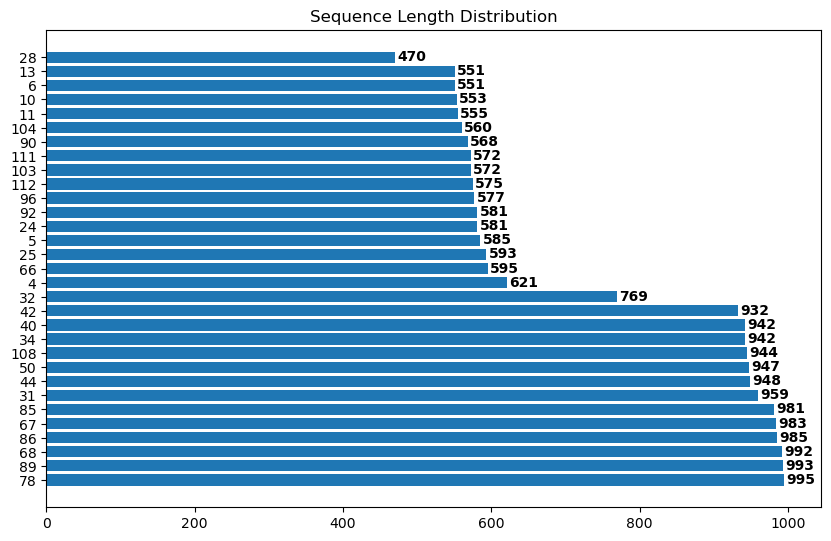

In [84]:
draw_bar_chart(test_sequence_length_distribution, title="Sequence Length Distribution")

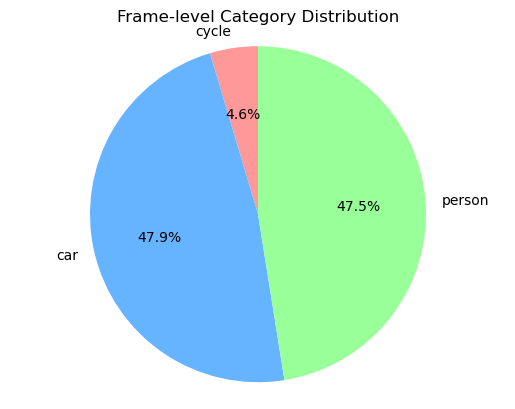

In [85]:
draw_pie_chart(test_category_distribution_frame_level_dict, title="Frame-level Category Distribution")

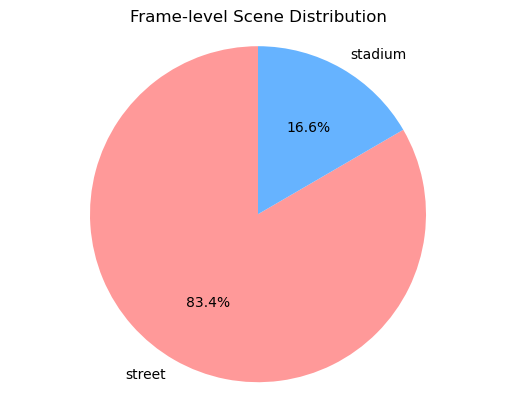

In [86]:
draw_pie_chart(test_scene_distribution_frame_level_dict, title="Frame-level Scene Distribution")

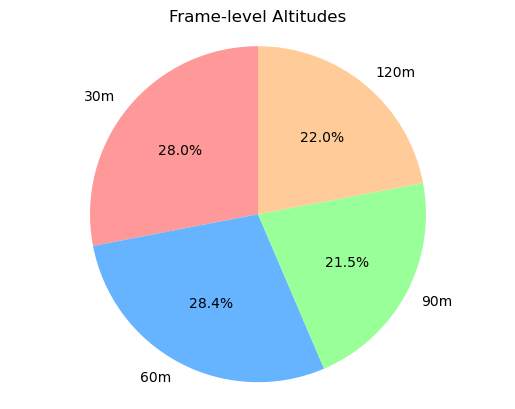

In [87]:
draw_pie_chart(test_altitude_distribution_frame_level_dict, title="Frame-level Altitudes")

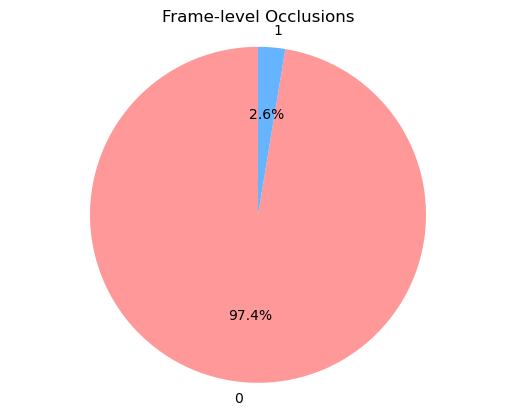

In [88]:
draw_pie_chart(test_occlusion_distribution_frame_level_dict, title="Frame-level Occlusions")

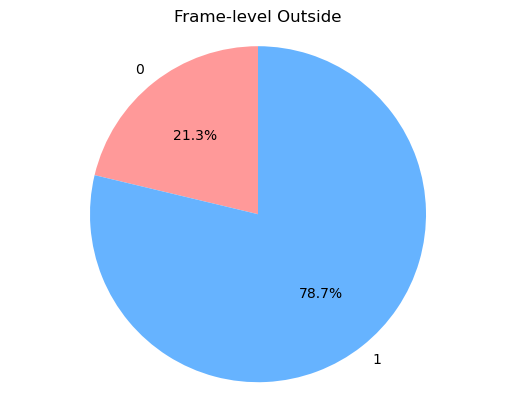

In [89]:
draw_pie_chart(test_outside_distribution_frame_level_dict, title="Frame-level Outside")

### Overall

In [90]:
frames_ratio_dict = {'train': train_frames, 'val': val_frames, 'test': test_frames}

In [91]:
sequences_ratio_dict = {'train': train_video_sequences, 'val': val_video_sequences, 'test': test_video_sequences}

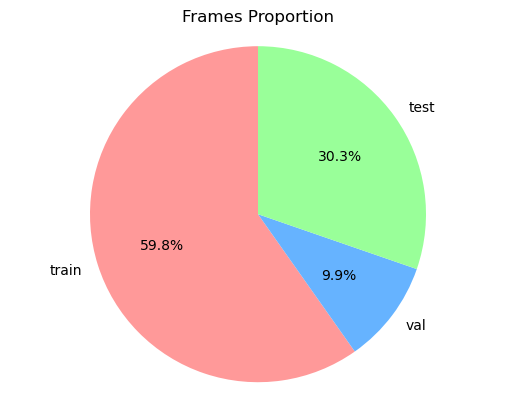

In [92]:
draw_pie_chart(frames_ratio_dict, 'Frames Proportion')

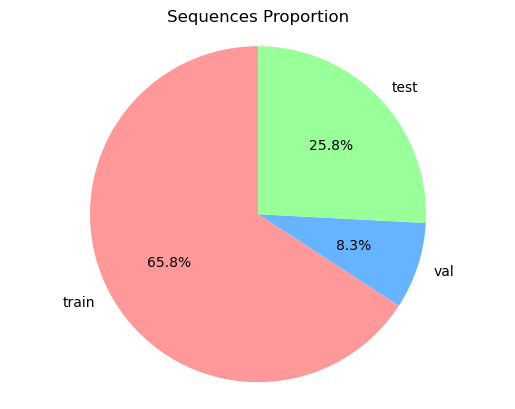

In [93]:
draw_pie_chart(sequences_ratio_dict, 'Sequences Proportion')

In [94]:
assert train_video_sequences + val_video_sequences + test_video_sequences == total_video_sequences
assert train_frames + val_frames + test_frames == total_frames

In [95]:
# assert that there is no duplication between train, val and test
assert not set(train_list).intersection(set(val_list))
assert not set(train_list).intersection(set(test_list))
assert not set(val_list).intersection(set(test_list))

# Dataset Integrity Check

In [1]:
from data_integrity_check import integrity_check

In [2]:
"""
check list:
- seq num is 119
- frames number count equal to .csv file
- all files exists
- all seq frames > 0
- thermal shape is (512, 640, 3)
- rgb shape is (1080, 1920, 3)
- xml exists
"""
# dataset_root_dir = 'DATASET_ROOT'
integrity_check(dataset_root_dir)

100%|██████████| 120/120 [3:02:24<00:00, 91.21s/it]  

data integrity check passed!
